### Fatemeh Habibimoghaddam


![image](https://cdn.sanity.io/images/0b678gck/buoy-public-site/8c0b9e79b6c54149f7000b91e29665dcadba4fb2-1500x1500.jpg?w=1500&q=70&auto=format&dpr=1)

<h1 style='background:blueviolet;border:0; border-radius: 10px; color:#FFF9ED'><center> Performing Convolutional Neural Network (CNN) on Chest X-Ray Images for Prediction of Pneumonia done by tensorflow & keras</center></h1><a id='lib'></a>

<span style="color:black;font-weight:700;font-size:25px">
Table of Contents  
</span> 

* [1. Introduction](#introduction)
* [2. Loading the Dataset](#loading)
* [3. Importing libraries and files](#importing)
* [4. Visualization & Preprocessing](#visualization)
* [5. Creation of the CNN model](#creation)
* [6. Evaluation of the results](#evaluation)

# <p style="background-color:blueviolet;font-family:Comic Sans MS;color:#FFF9ED;font-size:125%;text-align:center;border-radius:5px 5px;"> 1. Introuduction <a class="anchor" id="introduction"></a> </p>

<span style="color:blueviolet;font-weight:700;font-size:25px">
    &#10148; About Pneumonia
</span> 

* Pneumonia is an infection in one or both lungs. Bacteria, viruses, and fungi cause it. The infection causes inflammation in the air sacs in your lungs, which are called alveoli. The alveoli fill with fluid or pus, making it difficult to breathe.
* Pneumonia is usually caused by inhalation of airborne droplets from a sneeze or cough. You can also get these types of pneumonia by coming into contact with surfaces or objects that are contaminated with pneumonia-causing bacteria or viruses.
* Chest X-Ray Images can help your doctor determine what type of pneumonia you have.
* There are 3 types of pneumonia including Bacterial,Viral, and Fungal.

<span style="color:blueviolet;font-weight:700;font-size:25px">
    &#10148; Objective
</span> 

The aim of this kernel is to implement the convolutional neural network (CNN) to predict whether the patient suffers from pneumonia based on chest x-ray images.

# <p style="background-color:blueviolet;font-family:Comic Sans MS;color:#FFF9ED;font-size:125%;text-align:center;border-radius:5px 5px;"> 2. Loading the Dataset <a class="anchor" id="loading"></a> </p>

In [1]:
import os
print(os.listdir("../input")) 

['chest-xray-pneumonia']


In [2]:
DIR = os.listdir('../input/chest-xray-pneumonia/chest_xray')
print(DIR)

['chest_xray', '__MACOSX', 'val', 'test', 'train']


## Our data is located in three folders:

In [3]:
train_folder = '../input/chest-xray-pneumonia/chest_xray/train'
test_folder = '../input/chest-xray-pneumonia/chest_xray/test'
val_folder = '../input/chest-xray-pneumonia/chest_xray/val'

# <p style="background-color:blueviolet;font-family:Comic Sans MS;color:#FFF9ED;font-size:125%;text-align:center;border-radius:5px 5px;"> 3. Importing libraries and files <a class="anchor" id="importing"></a> </p>

## Importing libraries

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2

#Getting rid of Tensorflow CUDA warnings
import os
os.environ ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

import warnings
warnings.filterwarnings ('ignore')

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import load_img, img_to_array
print ("tensorflow version is:",tf.__version__)

tensorflow version is: 2.9.2


## Importing files

In [5]:
Train = keras.utils.image_dataset_from_directory (
    directory = '../input/chest-xray-pneumonia/chest_xray/train',
    labels = "inferred",
    label_mode = "categorical",
    batch_size = 32,
    image_size = (256,256))
Test = keras.utils.image_dataset_from_directory (
    directory = '../input/chest-xray-pneumonia/chest_xray/test',
    labels = "inferred",
    label_mode = "categorical",
    batch_size = 32,
    image_size = (256,256))
Validation = keras.utils.image_dataset_from_directory (
    directory = '../input/chest-xray-pneumonia/chest_xray/val',
    labels ="inferred",
    label_mode = "categorical",
    batch_size = 32,
    image_size = (256 , 256))

Found 5216 files belonging to 2 classes.
Found 624 files belonging to 2 classes.
Found 16 files belonging to 2 classes.


### Printing Classes to observe how many classes are there in my dataset.

In [6]:
print (Test.class_names)
print (Train.class_names)
print (Validation.class_names)

['NORMAL', 'PNEUMONIA']
['NORMAL', 'PNEUMONIA']
['NORMAL', 'PNEUMONIA']


The dataset comprised of 5856 Chest X-Ray images and contains 3 folders (train, test, val). In addition it contains 2 subfolders (Pneumonia/Normal).  5856 Chest X-Ray images. 

# <p style="background-color:blueviolet;font-family:Comic Sans MS;color:#FFF9ED;font-size:125%;text-align:center;border-radius:5px 5px;"> 4.  Visualization & Preprocessing <a class="anchor" id="visualization"></a> </p>

Text(0.5, 1.0, 'Validation data set')

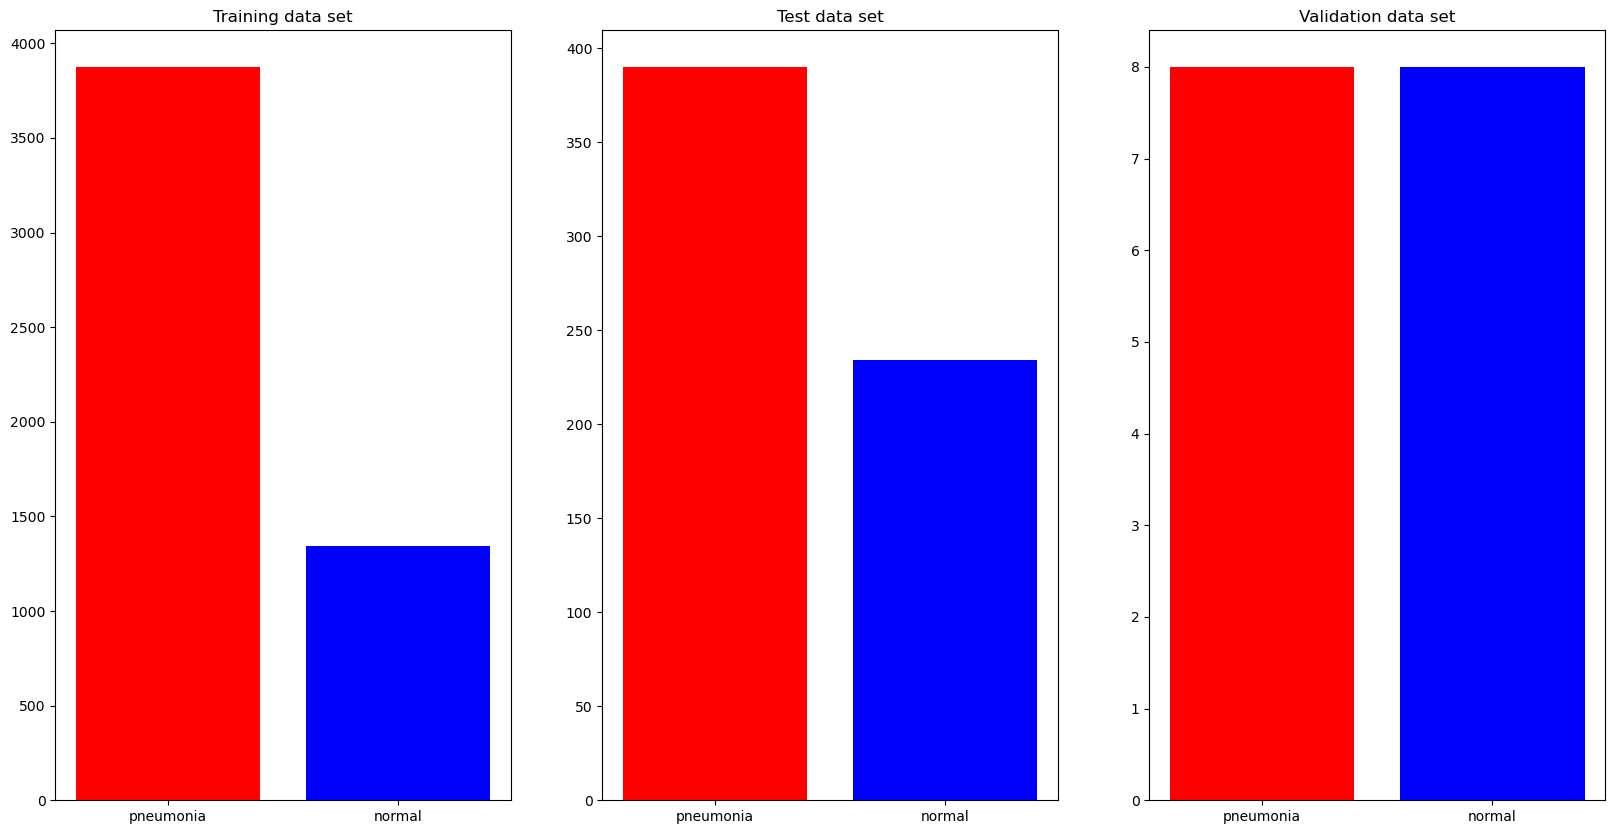

In [7]:
fig = plt.figure (figsize = (20 , 10))
plt.subplot (1 , 3 , 1)
c = ['red' , 'blue']
plt.bar (x = ["pneumonia","normal"] , height = (len (os.listdir (train_folder + "/PNEUMONIA")) , len (os.listdir (train_folder + "/NORMAL"))) , color = c)
plt.title ("Training data set")
plt.subplot (1 , 3 , 2)
plt.bar (x = ["pneumonia","normal"] , height = (len (os.listdir (test_folder + "/PNEUMONIA")) , len (os.listdir (test_folder + "/NORMAL"))) , color = c)
plt.title ("Test data set")
plt.subplot (1 , 3 , 3)
plt.bar (x = ["pneumonia","normal"] , height = (len (os.listdir (val_folder + "/PNEUMONIA")) , len (os.listdir (val_folder + "/NORMAL"))) , color = c)
plt.title ("Validation data set")

In [8]:
labels = ['PNEUMONIA' , 'NORMAL']
img_size = 200
def get_training_data (data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join (data_dir , label)
        class_num = labels.index (label)
        for img in os.listdir (path):
            try:
                img_arr = cv2.imread (os.path.join (path , img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize (img_arr, (img_size , img_size))
                data.append ([resized_arr , class_num])
            except Exception as e:
                print (e)
    return np.array (data)

In [9]:
train = get_training_data ('../input/chest-xray-pneumonia/chest_xray/chest_xray/train')
test = get_training_data ('../input/chest-xray-pneumonia/chest_xray/chest_xray/test')
val = get_training_data ('../input/chest-xray-pneumonia/chest_xray/chest_xray/val')

OpenCV(4.5.4) /tmp/pip-req-build-jpmv6t9_/opencv/modules/imgproc/src/resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.5.4) /tmp/pip-req-build-jpmv6t9_/opencv/modules/imgproc/src/resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.5.4) /tmp/pip-req-build-jpmv6t9_/opencv/modules/imgproc/src/resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.5.4) /tmp/pip-req-build-jpmv6t9_/opencv/modules/imgproc/src/resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



Text(0.5, 1.0, 'NORMAL')

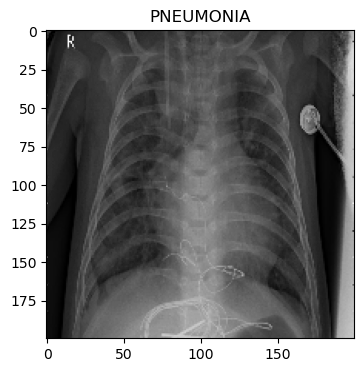

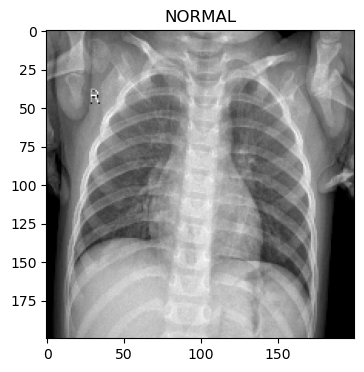

In [10]:
plt.figure (figsize = (8,4))
plt.imshow (train [0][0] , cmap = 'gray')
plt.title (labels [train [0][1]])

plt.figure (figsize = (8,4))
plt.imshow (train [-1][0], cmap = 'gray')
#plt.axis ('off')
plt.title (labels [train [-1][1]])

# <p style="background-color:blueviolet;font-family:Comic Sans MS;color:#FFF9ED;font-size:125%;text-align:center;border-radius:5px 5px;"> 5.  Creation of the CNN model <a class="anchor" id="creation"></a> </p>

In [11]:
# Creation of CNN
CNN = tf.keras.models.Sequential ()
# Adding Convolution layer
CNN.add (tf.keras.layers.Conv2D (filters = 32, kernel_size = 3, activation = "relu", input_shape = [256,256,3]))
# Adding Pooling layer
CNN.add (tf.keras.layers.MaxPool2D (pool_size = 2 , strides = 2))
# Adding Flattening layer
CNN.add (tf.keras.layers.Flatten ())
# Adding Full connection layer
CNN.add (tf.keras.layers.Dense (units = 512 , activation ="relu"))
# Adding Output Layer
CNN.add (tf.keras.layers.Dense (units = 2 , activation ="sigmoid"))
CNN.summary ()
CNN.save("cnn_model.bin")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 516128)            0         
                                                                 
 dense (Dense)               (None, 512)               264258048 
                                                                 
 dense_1 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 264,259,970
Trainable params: 264,259,970
Non-trainable params: 0
__________________________________________

## Training the CNN

In [12]:
CNN.compile (optimizer = "adam" , loss ="binary_crossentropy" , metrics = ["accuracy"])

In [13]:
CNN.fit (x = Train , validation_data = Validation , epochs = 2)

Epoch 1/2
163/163 [==============================] - 48s 245ms/step - loss: 488.2657 - accuracy: 0.8936 - val_loss: 25.6254 - val_accuracy: 0.6250
Epoch 2/2
163/163 [==============================] - 30s 175ms/step - loss: 2.8249 - accuracy: 0.9749 - val_loss: 1.6916 - val_accuracy: 0.9375


# <p style="background-color:blueviolet;font-family:Comic Sans MS;color:#FFF9ED;font-size:125%;text-align:center;border-radius:5px 5px;"> 6.  Evaluation of the results <a class="anchor" id="evaluation"></a> </p>

In [14]:
test_image = tf.keras.utils.load_img ("../input/chest-xray-pneumonia/chest_xray/test/NORMAL/IM-0016-0001.jpeg" , target_size = (256,256))

In [15]:
test_image = tf.keras.utils.img_to_array (test_image)
test_image = np.expand_dims (test_image , axis = 0)
Result = CNN.predict (test_image)

1/1 [==============================] - 0s 115ms/step


In [16]:
print (Result)

[[1. 1.]]


In [17]:
import numpy as np
test_image = tf.keras.utils.load_img ("../input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/person100_bacteria_482.jpeg" , target_size = (256,256))

In [18]:
test_image = tf.keras.utils.img_to_array (test_image)
test_image = np.expand_dims (test_image , axis = 0)
Result = CNN.predict (test_image)

1/1 [==============================] - 0s 18ms/step


In [19]:

print (Result)

[[0. 1.]]


# <p style="background-color:blueviolet;font-family:Comic Sans MS;color:#FFF9ED;font-size:125%;text-align:center;border-radius:5px 5px;">  Please upvote if you like the work. Any feedback is appreciated. Thank you. <a class="anchor" id="evaluation"></a> </p>